In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('course_730.csv', engine='python')

df_org = df

df = df.drop([list(df)[0], list(df)[-3], 'final_score', 'group'], axis=1)
#df = df.drop(['hw1_score', 'hw2_score', 'hw3_score', 'student_id'], axis=1)
df = df.drop(['student_id', 'hw1_score', 'hw2_score'], axis=1)

df = df.drop(['HW1_C', 'HW1_R', 'HW1_W', 'HW1_E'], axis=1)
df = df.drop(['HW2_C', 'HW2_R', 'HW2_W', 'HW2_E'], axis=1)
df = df.drop(['HW3_C', 'HW3_R', 'HW3_W', 'HW3_E'], axis=1)

df = df.rename(index=str, columns={list(df)[-1]: "label_2",
                              list(df)[-2]: "label_1"})
df = df[df.HW1.notna()]
df = df[df.HW2.notna()]
df = df[df.HW3.notna()]
df = df[df.HW3.notna()]
df = df[df.HW2 != 'error']
df = df[df.label_2 != '?�修']
df = df[df.label_1.notna()]


In [10]:
feature_list = list(df)
hw3_df = df[feature_list[3:4] + feature_list[24:34]]
hw3_df.head()

,hw3_score,w3_onlineDays,w3_onlineCount,w3_onlineTime,w3_passCount,w3_failCount,w3_SyntaxError,w3_NameError,w3_IndentationError,w3_ValueError,w3_TypeError
0,50.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50.0,2.0,1.0,5096.197,71.0,8.0,2.0,5.0,0.0,1.0,0.0
8,50.0,1.0,1.0,3098.358,16.0,6.0,5.0,0.0,1.0,0.0,0.0
9,0.0,2.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cross Correlation

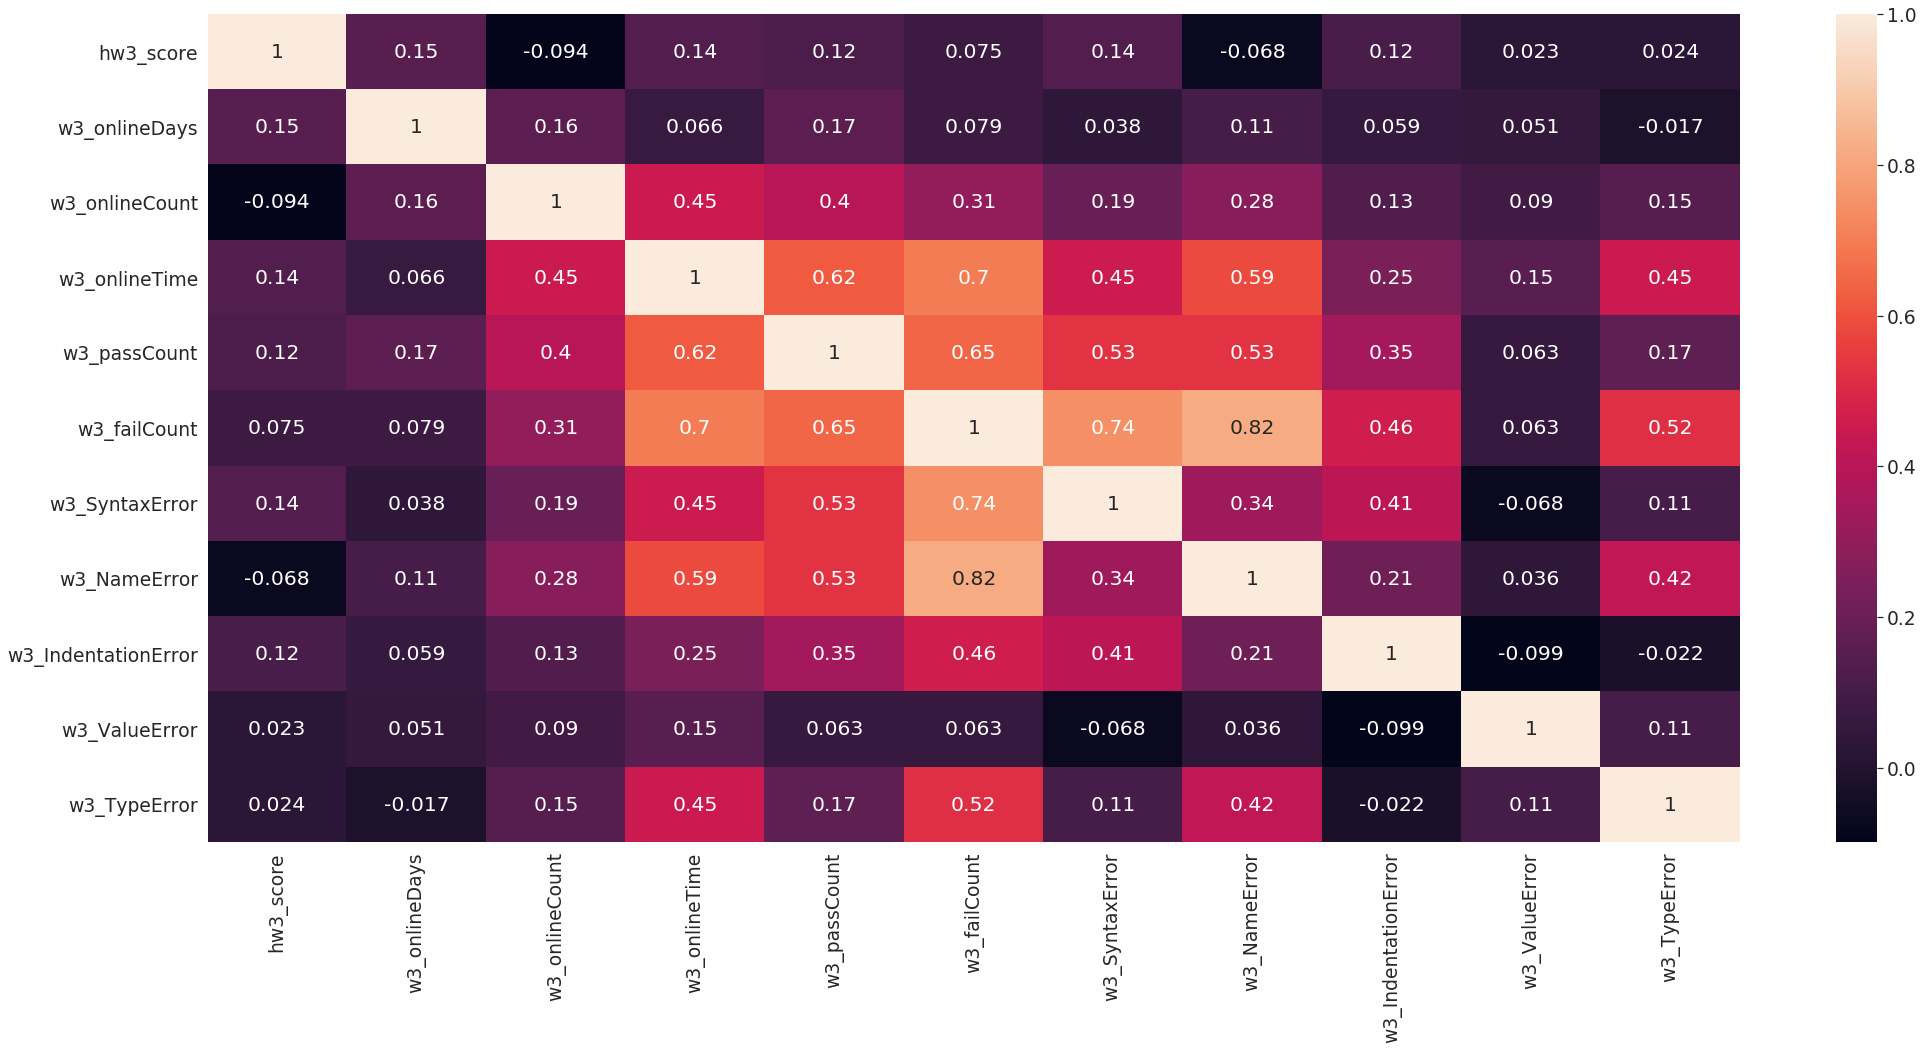

In [11]:
import seaborn as sns

Var_Corr = hw3_df.corr()
# plot the heatmap and annotation on it
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=1.7)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.tight_layout()
#plt.savefig('svm_conf.png', dpi=400)

# Distribution

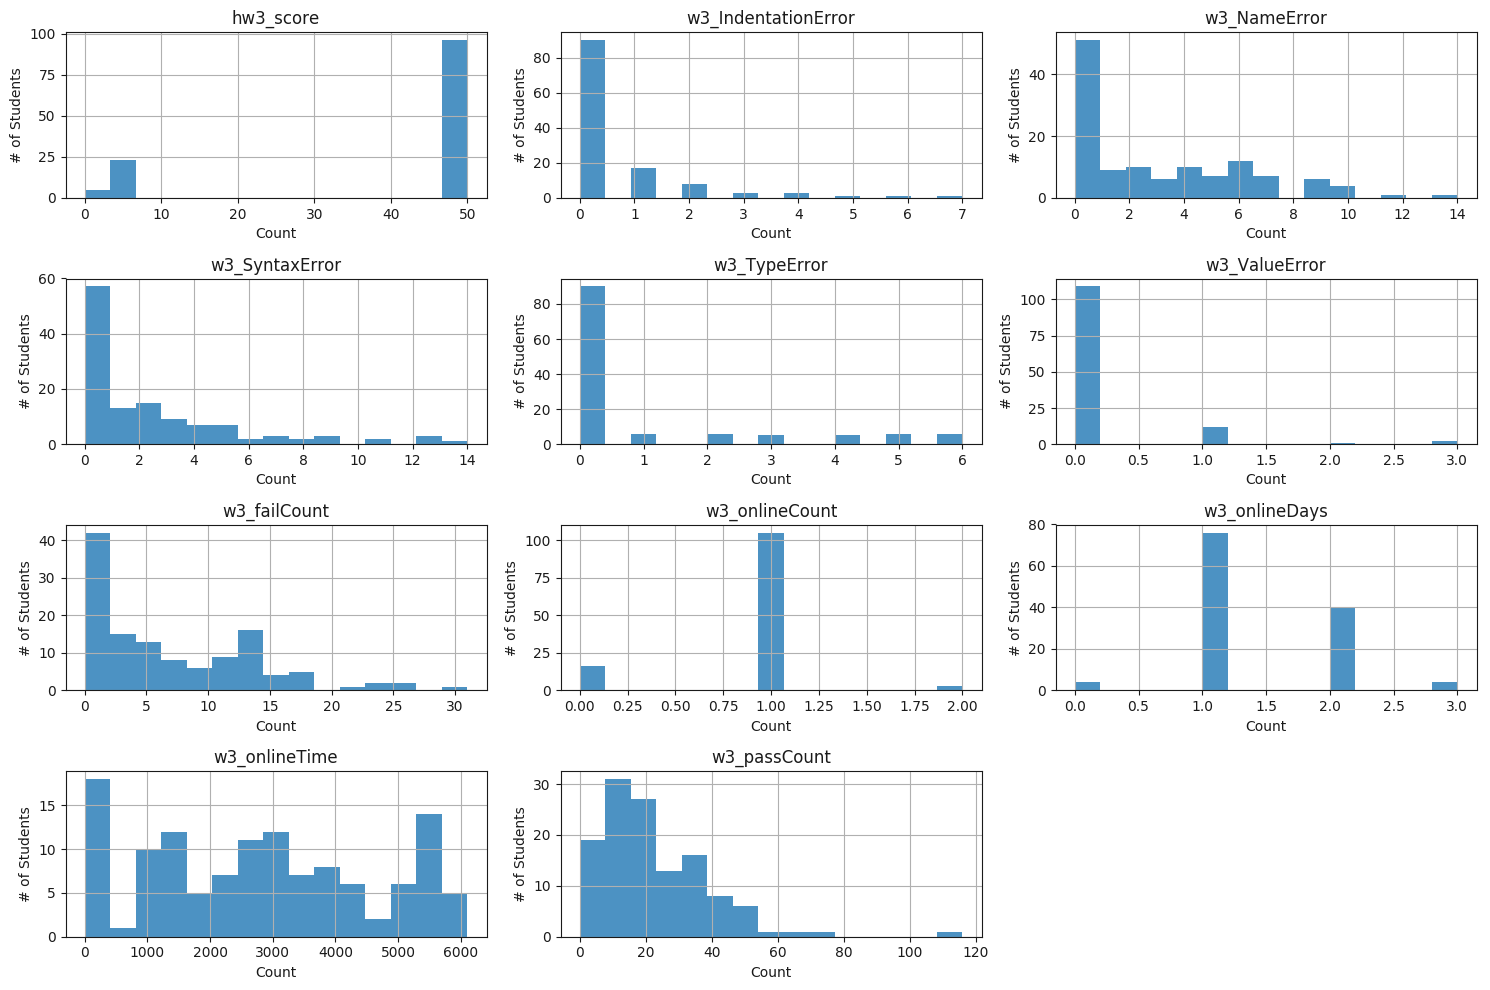

In [12]:
#plt.figure(figsize=(15, 15))
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
#matplotlib.rc('axes', titlesize=10) 

ax = hw3_df.hist(alpha=0.8, bins=15, figsize=(15, 10))
#for x in ax:
#     x.set_title('x')

for array in ax:
    for subplot in array:
        subplot.set_ylabel('# of Students', fontsize=10)
        subplot.set_xlabel('Count', fontsize=10)

plt.tight_layout()
#plt.savefig('svm_conf.png', dpi=400)

# Create Class

In [13]:
hw3_df_km = hw3_df

hw3_df_km['class'] = hw3_df_km['hw3_score'] < 24
hw3_df_km['duration'] = hw3_df_km['w3_onlineTime'] / 60
hw3_df_km['duration'] = hw3_df_km['duration'].astype(int)

hw3_df_km = hw3_df_km.drop(['hw3_score', 'w3_onlineTime'], axis=1)
hw3_df_km

,w3_onlineDays,w3_onlineCount,w3_passCount,w3_failCount,w3_SyntaxError,w3_NameError,w3_IndentationError,w3_ValueError,w3_TypeError,class,duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
5,2.0,1.0,71.0,8.0,2.0,5.0,0.0,1.0,0.0,False,84
8,1.0,1.0,16.0,6.0,5.0,0.0,1.0,0.0,0.0,False,51
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0
12,2.0,1.0,41.0,14.0,1.0,9.0,0.0,1.0,2.0,False,98
14,2.0,1.0,13.0,13.0,2.0,4.0,0.0,0.0,6.0,False,54
15,2.0,1.0,28.0,13.0,3.0,6.0,0.0,1.0,3.0,False,73
16,3.0,1.0,21.0,8.0,4.0,1.0,1.0,0.0,0.0,False,48
17,2.0,1.0,15.0,6.0,3.0,0.0,1.0,0.0,2.0,False,35


# KaplanMeierFitter

In [14]:
kmf = KaplanMeierFitter() 
kmf.fit(durations = hw3_df_km.duration, event_observed = hw3_df_km['class'])
#kmf.event_table

<lifelines.KaplanMeierFitter: fitted with 124 observations, 96 censored>

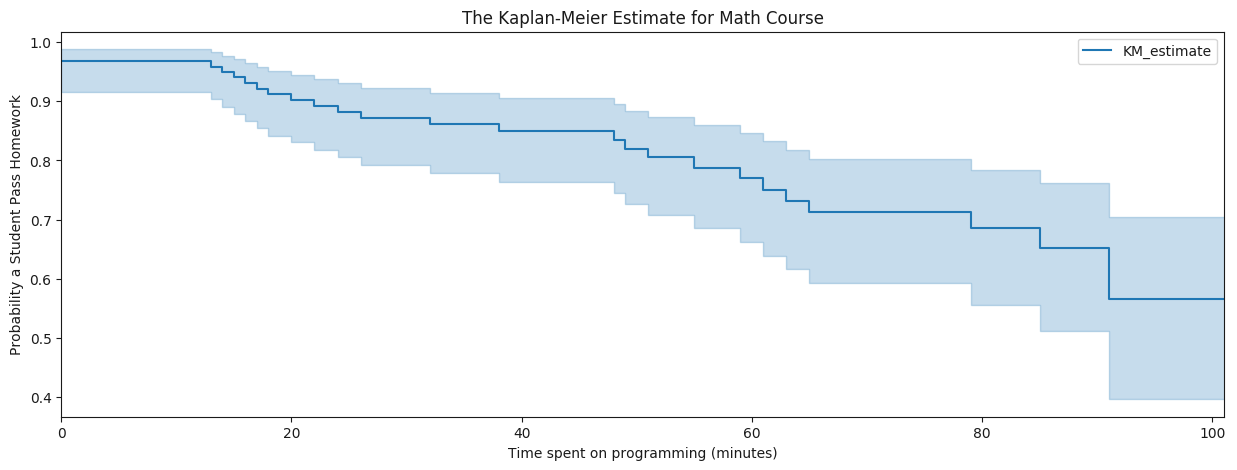

In [15]:

#plt.clf()
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 

# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Math Course")
plt.ylabel("Probability a Student Pass Homework")
plt.xlabel("Time spent on programming (minutes)")

plt.show()

In [16]:

#variable = 'w3_ValueError'
#threadhold = 1

#variable = 'w3_TypeError'
#threadhold = 3


#variable = 'w3_SyntaxError'
#threadhold = 10

#best fit
#variable = 'w3_onlineDays'
#threadhold = 3

#best fit
variable = 'w3_passCount'
threadhold = 25

hw3_df_km['class_passCount'] = hw3_df_km[variable] < threadhold
#hw3_df_km['class_passCount'] = hw3_df_km.w3_TypeError < 3
hw3_df_km = hw3_df_km.drop([variable], axis=1)
hw3_df_km

,w3_onlineDays,w3_onlineCount,w3_failCount,w3_SyntaxError,w3_NameError,w3_IndentationError,w3_ValueError,w3_TypeError,class,duration,class_passCount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,True
5,2.0,1.0,8.0,2.0,5.0,0.0,1.0,0.0,False,84,False
8,1.0,1.0,6.0,5.0,0.0,1.0,0.0,0.0,False,51,True
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0,True
12,2.0,1.0,14.0,1.0,9.0,0.0,1.0,2.0,False,98,False
14,2.0,1.0,13.0,2.0,4.0,0.0,0.0,6.0,False,54,True
15,2.0,1.0,13.0,3.0,6.0,0.0,1.0,3.0,False,73,False
16,3.0,1.0,8.0,4.0,1.0,1.0,0.0,0.0,False,48,True
17,2.0,1.0,6.0,3.0,0.0,1.0,0.0,2.0,False,35,True


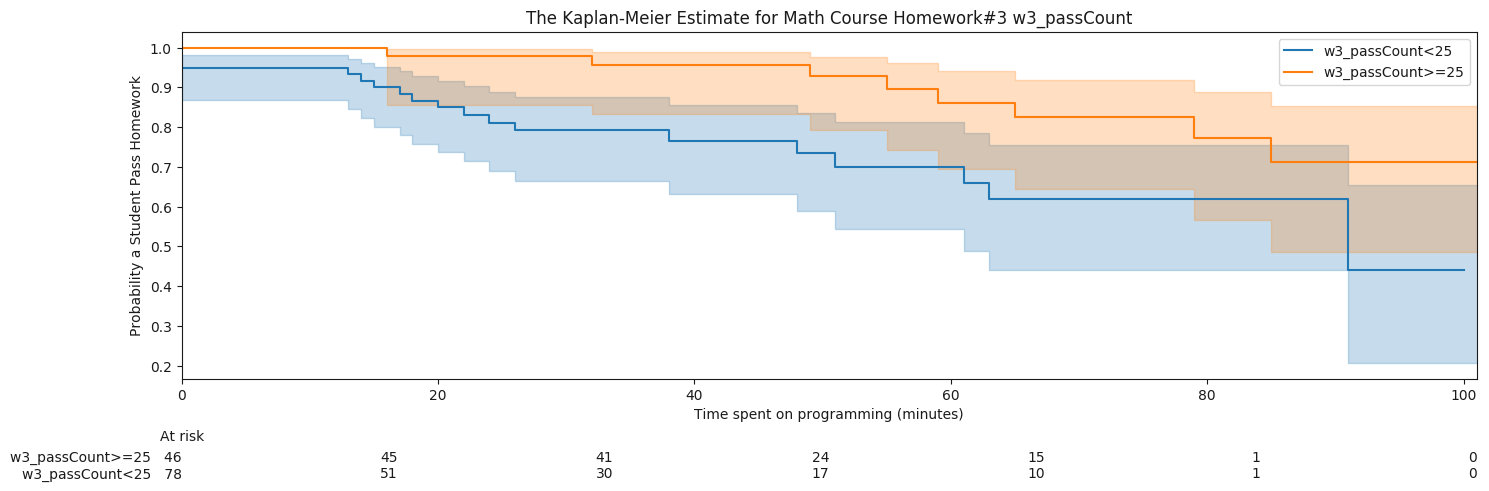

In [17]:
from lifelines import KaplanMeierFitter

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 
ax = plt.subplot(111)

ix = hw3_df_km['class_passCount'] == True

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(hw3_df_km.loc[ix]['duration'], 
                     hw3_df_km.loc[ix]['class'], 
                     label = variable + '<' + str(threadhold)).plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(hw3_df_km.loc[~ix]['duration'], 
                 hw3_df_km.loc[~ix]['class'],
                 label = variable + '>=' + str(threadhold)).plot(ax=ax)

plt.title("The Kaplan-Meier Estimate for Math Course Homework#3 " +  variable)
plt.ylabel("Probability a Student Pass Homework")
plt.xlabel("Time spent on programming (minutes)")

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

plt.tight_layout()
plt.savefig('km_hw3_passcount.png', dpi=400)

# LogRank

In [19]:
from lifelines.statistics import multivariate_logrank_test


results = multivariate_logrank_test(hw3_df_km['duration'], 
                                    hw3_df_km['class_passCount'], 
                                    hw3_df_km['class'])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           6.17 0.01      6.27


# Cox Proportional Hazard Model

In [20]:
from lifelines import CoxPHFitter

hw3_df_cph = hw3_df_km.drop(['w3_onlineCount'], axis=1)
#hw1_df_cph = hw1_df_km

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(hw3_df_cph, duration_col='duration', event_col='class')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 124 observations, 96 censored>
      duration col = 'duration'
         event col = 'class'
number of subjects = 124
  number of events = 28
    log-likelihood = -103.13
  time fit was run = 2019-02-15 16:03:22 UTC

---
                     coef  exp(coef)  se(coef)     z    p  -log2(p)  lower 0.95  upper 0.95
w3_onlineDays       -0.74       0.48      0.47 -1.59 0.11      3.15       -1.66        0.18
w3_failCount        -0.73       0.48      0.50 -1.47 0.14      2.81       -1.70        0.24
w3_SyntaxError       0.54       1.71      0.50  1.07 0.28      1.82       -0.44        1.52
w3_NameError         0.76       2.14      0.50  1.52 0.13      2.95       -0.22        1.75
w3_IndentationError  0.42       1.52      0.56  0.75 0.45      1.14       -0.68        1.51
w3_ValueError        0.51       1.66      0.65  0.78 0.44      1.20       -0.77        1.79
w3_TypeError         0.43       1.54      0.51  0.84 0.40      1.31       -0.58        1.44
class_pa

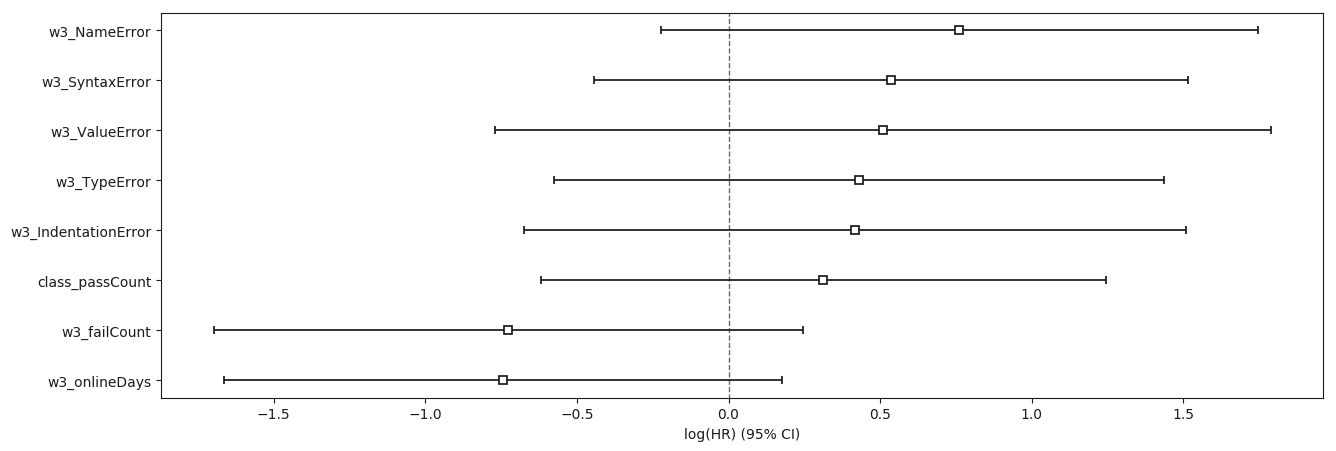

In [21]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('figure', figsize=(15, 5)) 
cph.plot()